![FH Kiel, enjoy the North!](Images/fachhochschule-kiel-logo.svg)
### "Portfolio-Exam Part II"
    MADS-MMS - WS 2021/2022
    Jannik Paul - 940134

In [1]:
# Import all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

    - Mathematics and Multivariate Statistics in practical application
## "Family business - Affari di famiglia"
#### The scenario
We are a young Data Science company conducting mainly market analysis for our customers. As a start-up of consultants hailing from various domains we offer our services to a broad range of medium to small businesses. Here we have been tasked by a struggling, historic family business who own multiple shops and sites, offering various services to tourists and locals in the ancient city of Syracuse, right on the southeastern tip of Sicilia. Our customers, who are doing their best to navigate the new world in the net, have asked us to find ways on how to improve their ratings - in best case on all online platforms - and how to increase the frequency of their visitors. Everyone is battling over the few tourists and local customers available in his own ways these days.

##### There are a few angles of attack we have received as leading questions on the matter:

- In what type of attraction should we place flyers to increase the frequency of our local and older visitors?
- What type of attraction could we aim at to place any online advertisements to?
- Online users seem to have rated our attraction very differently, some were unimpressed, others lost in wonder. Why would that be?
- If there are preferences among the visitors, how can we find out about this and attract those of which we could be sure to like our attraction, before even having visited us? Is that possible?

Compelling rating platforms are TripAdvisor and Google, often used to find spots to visit. The data from the ratings there could be a good place to start.

First thoughts on how to look at the data: Maybe with this we can characterize the users based on their preferences. One user might like museums, and another prefers juice bars. Also, could there be a correlation between the preferences - would someone who likes museums also gasp at the historic beauty of religious institutions, such as when viewing the Cappella Palatina, built by Northmen in Palermo? Is there a positive affinity or a negative one of rating success coming from party-goers? Are the users more critical on some type of sites than on others?

In short: Are there clusters of preferences?

### First Exploration
#### Finding a dataset that fits our mission

So let's read in some of the datasets to start exploring. The first dataset is from Shini Renjith and was populated by crawling TripAdvisor. 

[The TripAdvisor dataset can be found here on the UCI website.](https://archive.ics.uci.edu/ml/datasets/Travel+Reviews)

In [2]:
df0 = pd.read_csv("Data/tripadvisor_review.csv")

In [3]:
df0.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


The ratings span from 0 to 4 and are the averages for each user in this category.

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


The Tripadvisor Dataset seems to be pretty orderly.
Great for a real one.  It contains reviews of users on destinations in East Asia for 10 different categories. However, as it stems from East Asia, it might be a problem. We could have a foundational bias in the dataset which may or may not map properly on the reality of tourists in Italy. It also seems that the dataset is not rich enough, a larger one could carry more statistical relevance.

So instead we will continue looking and explore a richer, Europe-focused dataset from Google.

#### The Google dataset which serves our mission
This dataset stems from the same author and contains Google Reviews from 24 categories. The score spans from 1 to 5 and maps the average user rating per category. It is focused on Europe and at first sight already seems richer.

[The Google dataset can be found here on the UCI website.](https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings)

In [5]:
# Reading in the dataset.
df = pd.read_csv("Data/google_review_ratings.csv")

In [6]:
# Checking the head of the dataset.
df.head(3)

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [7]:
# Checking a comprehensive overview, this gives a lot of information in a preview already.
# Please make sure to run ">Preferences: Open User Settings" and set "notebook.output.textLineLimit" to 35,
# as we have a few columns to deal with.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

The Google Dataset is larger and less orderly. As we use this in contrast to the smaller set, we must tidy up and probably preprocess this one, so we and our colleagues can work with it better and more efficiently, now and in the future. 

We notice:

    - [1] Column 0 carries no importance for our analysis.
    - [2] Column 25 is empty (an engineer would say this, a physicist would raise an eyebrow).
    - [3] Column 11 needs to be a float64.
    - [4] Columns 12 and 24 have nulls we don't want.
    - [5] The Columns need proper labeling so that we know what we are looking at.

### Data exploration and preparation
As a first step we'd like to pass some of the data set's attribute information into the tables. Naming the categories for what they represent should help contextualize better what we are looking at. It makes our dataset easier to work with for our colleagues as well.

In [8]:
# Put our dataframe into a new variable to work with, so that the source remains unaltered.
# This way we or anyone can later add information to the source dataframe and re-run the processing separately.
df_processed = df

###########################
### We work by our list ###
###########################

# [1],[2] Column 0 and 25 are unnecessary.

# We drop the columns along axis 1, hence all the values of the columns as well.
df_processed = df_processed.drop(["User", "Unnamed: 25"], axis=1)

In [9]:
# [3] Column 11 needs to be a float64.

# Attention: This is how we found position 2712.

### df_processed["Category 11"] = pd.to_numeric(df_processed["Category 11"])
# Run the previous line to receive the following error report:
# .to_numeric() returns: ValueError: Unable to parse string "2	2." at position 2712.

# This string must have been the troublemaker who turnt this column into an object, so we kill it with fire:
df_processed = df_processed.drop(axis = 0, labels = 2712)

# Then we run the .to_numeric() conversion again
df_processed["Category 11"] = pd.to_numeric(df_processed["Category 11"])

In [10]:
# [4] Columns 12 and 24 have nulls we don't want.

# .dropna() is the most efficient way to reduction.
df_processed = df_processed.dropna()

In [11]:
# [5] The Columns need proper labeling so that we know what we are looking at.
df_processed = df_processed.rename(columns={"Category 1" : "Churches", "Category 2" : "Resorts", "Category 3" : "Beaches", "Category 4" : "Parks", "Category 5" : "Theatres", "Category 6": "Museums", "Category 7" : "Malls", "Category 8" : "Zoo", "Category 9" : "Restaurants", "Category 10" : "Pubs/Bars", "Category 11" : "Local Services", "Category 12" : "Burger/Pizza Shops", "Category 13" : "Hotels/Other Lodgings", "Category 14" : "Juice Bars", "Category 15" : "Art Galleries", "Category 16" : "Dance Clubs", "Category 17" : "Swimming Pools", "Category 18" : "Gyms", "Category 19" : "Bakeries", "Category 20" : "Beauty & Spas", "Category 21" : "Cafes", "Category 22" : "View Points", "Category 23" : "Monuments", "Category 24" : "Gardens"})

In [12]:
# Now we check our Dataset. Orderly and clean, very nice.
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churches               5454 non-null   float64
 1   Resorts                5454 non-null   float64
 2   Beaches                5454 non-null   float64
 3   Parks                  5454 non-null   float64
 4   Theatres               5454 non-null   float64
 5   Museums                5454 non-null   float64
 6   Malls                  5454 non-null   float64
 7   Zoo                    5454 non-null   float64
 8   Restaurants            5454 non-null   float64
 9   Pubs/Bars              5454 non-null   float64
 10  Local Services         5454 non-null   float64
 11  Burger/Pizza Shops     5454 non-null   float64
 12  Hotels/Other Lodgings  5454 non-null   float64
 13  Juice Bars             5454 non-null   float64
 14  Art Galleries          5454 non-null   float64
 15  Danc

#### Distribution of the data
We want to get a first sight at the distribution of the ratings. It gives us a first idea if we need to process the data further.

    - [1] Histograms of the distribution for a preview on patterns.
    - [2] Boxplots to check for outliers and where averages are seated.

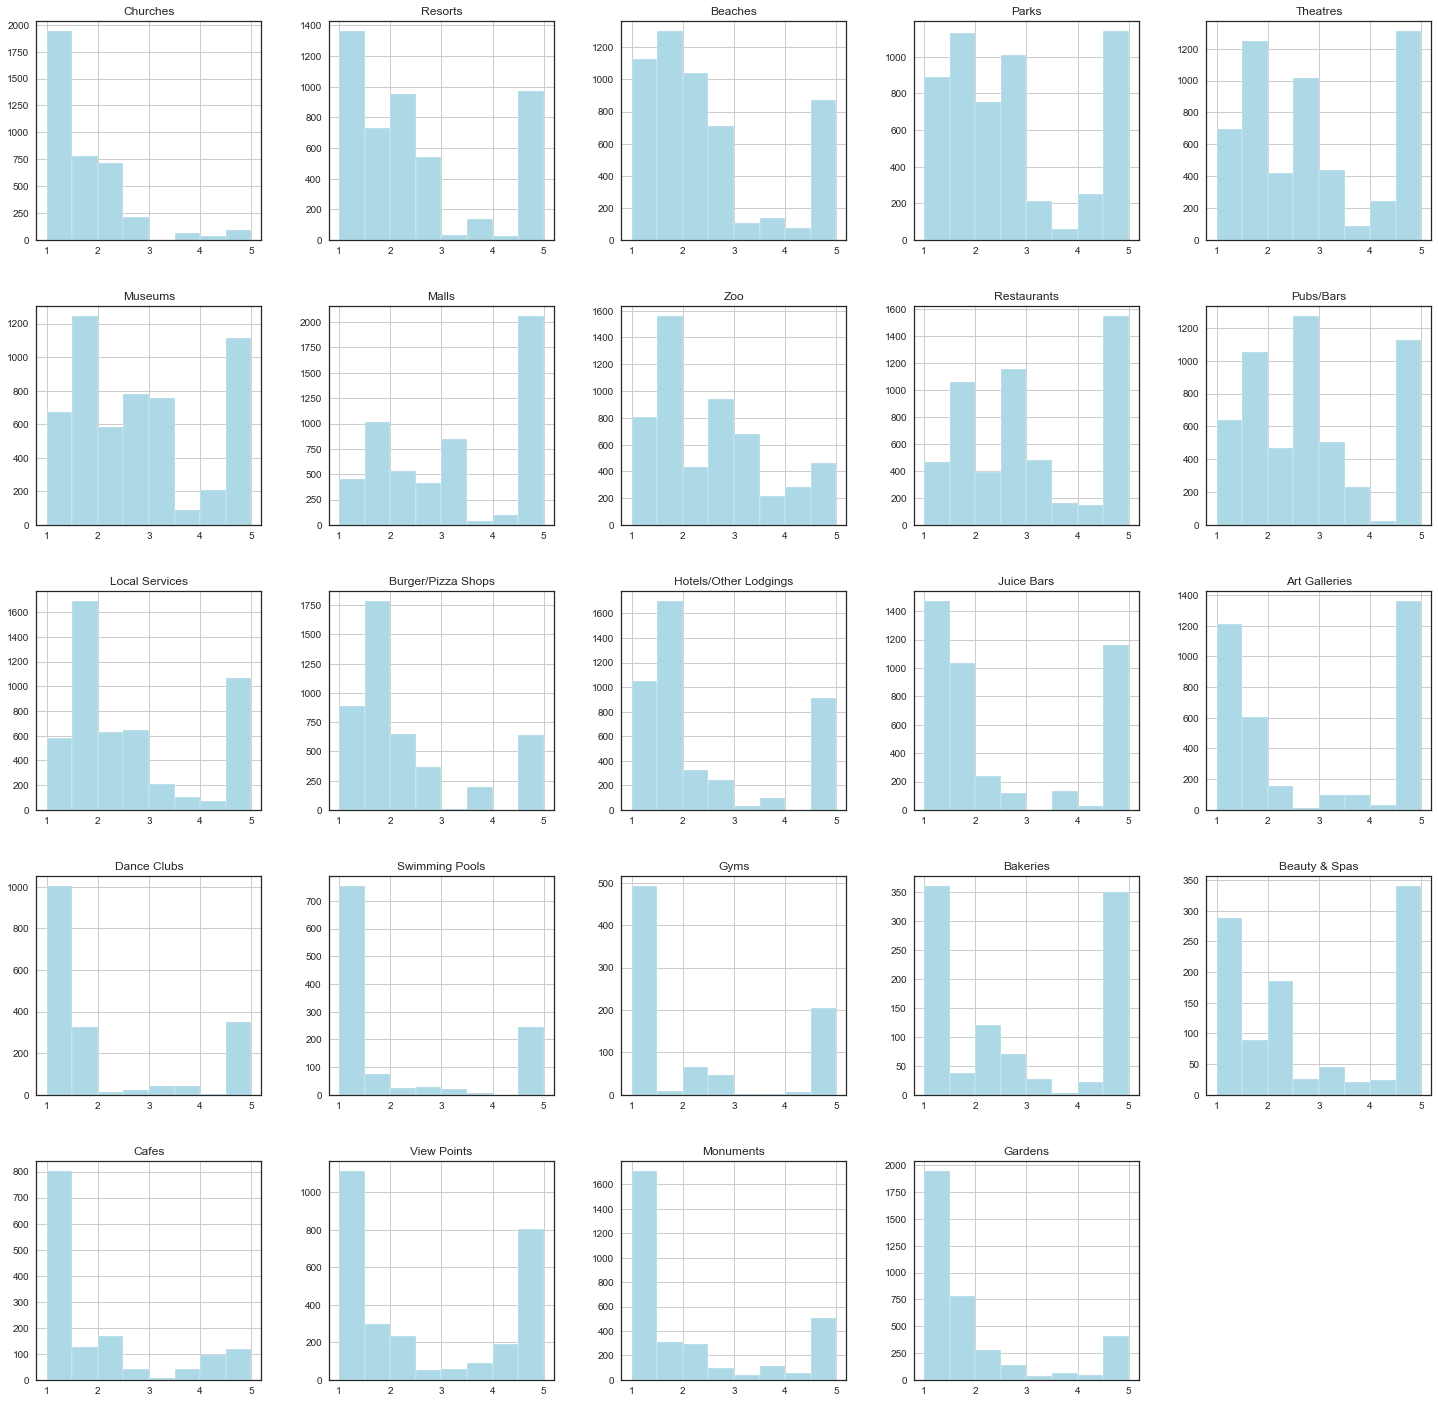

In [13]:
###########################
### We work by our list ###
###########################

# [1] Histograms of the distribution for a preview on patterns.

# We set up the seaborn-style to separate the bars from each other.
sns.set_style("white")

# We define the histograms total size, its color, and range the bins from 1 to 5, then set 0.5 for the binwith.
df_processed.hist(figsize=(25, 25), color = "lightblue", bins=np.arange(1, 5 + 0.1, 0.5))
plt.show()

Here we get a first impression on the distribution of the ratings. The scale is off by some, implying greater distance between the cases. We will have to scale the data to receive better clustering results later.

We also notice that many users rate to the extremes of 1 or 5 stars. We also suspect uneven averages with different distances to the mean. We do not need to be an astromech droid to already recognize some similar patterns which could become part of the same clusters.

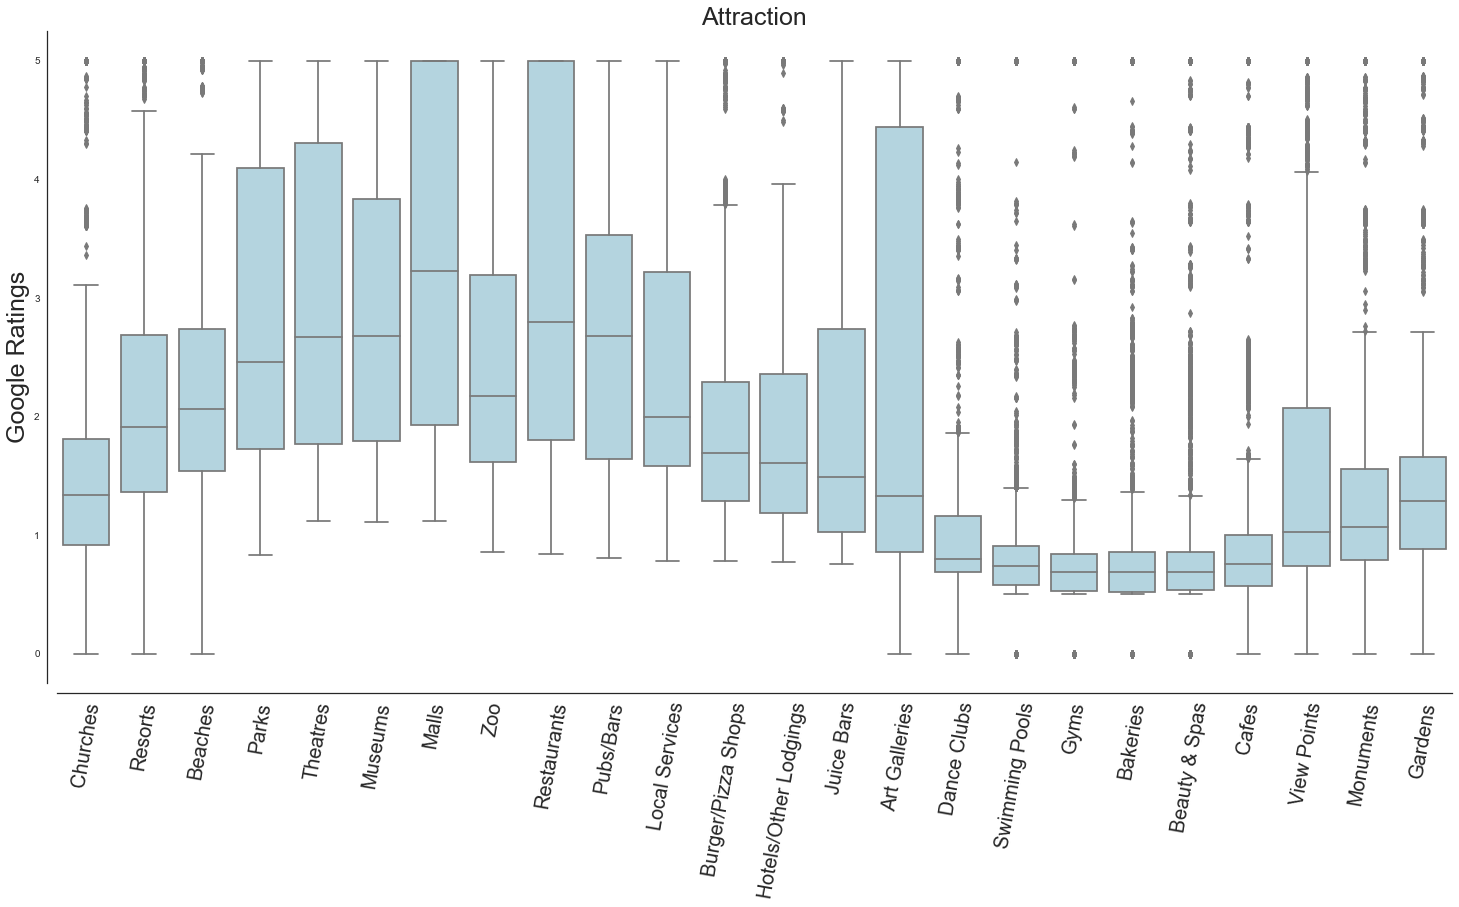

In [14]:
# [2] Boxplots to check for outliers and where averages are seated.

# We check in the utility wrapper and define its size.
Preview = plt.subplots(figsize = (25, 12))

# We call seaborn's boxplot and load df_processed.
Preview = sns.boxplot(data = df_processed, color = "lightblue")

# Here we set up an offset of distance for the boxplots to axis, set up labels, font size and x tick rotation.
sns.despine(offset=10)
Preview.set_title("Attraction", fontsize = 25)
Preview.set_ylabel("Google Ratings", fontsize = 25)
plt.xticks(rotation= 80, fontsize = 20)
plt.show()

Here we can show you the averages, the distribution, and the outliers. We explain to our customers why this is important: These boxplots tell us that the users are generally more satisfied with for example Malls and Restaurants. The averages also tell us they are more critical with for example Dance Clubs, Gyms and Bakeries. So there seems to be a different behavioral bias in rating.

Some features have a lot of outliers. The range of the plots also confirm our initial conclusion about outliers: Many users rate to the extremes - if they are satisfied they give 5 stars, if dissatisfied, just 1. 

    We can already give our first recommendation to the customer, which is that it is very important to avoid any source of dissatisfaction with his visitors, as we suspect the threshold of rating dissatisfaction seems lower than anything else.


All this is why one cannot simply run clustering code over data and expect good results. Fear not though, you got us. We will continue with further preprocessing, starting out with scaling we have mentioned when interpreting the histograms.

### Further preprocessing
We have already preprocessed the data, but before clustering cleanly, there is more work of preparation to do before we engage in actual clustering to find out common preferences of our guests. 

Among that is scaling the data, finding an optimal number of clusters (k) for our dataset, and a dimensionality reduction. Only then we can cluster accurately!

Hence we utilise another list:

    - [1] Looking at the optimal k for the unscaled data.
    - [2] Scaling the data informed and properly.
    - [3] Preparing and plotting the Silhouette Scores (method of the realms of clustering).
    - [4] Looking at the optimal k for the now scaled or transformed data by creating plots with the Silhouette Visualizer (method of the realms of clustering)

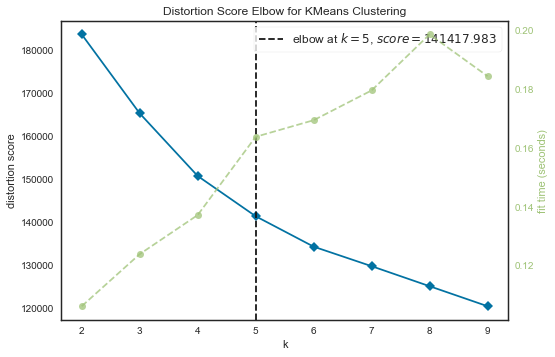

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
###########################
### We work by our list ###
###########################

# [1] Looking at the optimal k for the unscaled data.
# Elbow method on unscaled data - is it viable?

# We define the random state by the answer to the ultimate question of life, the universe, and everything.
km = KMeans(random_state=42)
# Then we call the KElbowvisualizer
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(df_processed)
visualizer.show()     

At first glance the result is clear, it seems as if it was k = 5. 

**However**, knowing the KElbowVisualizer's documentation, it is mentioned that a flat, soft arc of the distortion score curve should ring the alarm and indicate a weak result. The elbow method only goes by the euclidian distance. In this case this is not very satisfying, so we must employ heavier but more expressive methods to find a good number of clusters: 

The silhouette plot method regards more variables such as variance, skewness, et cetera.

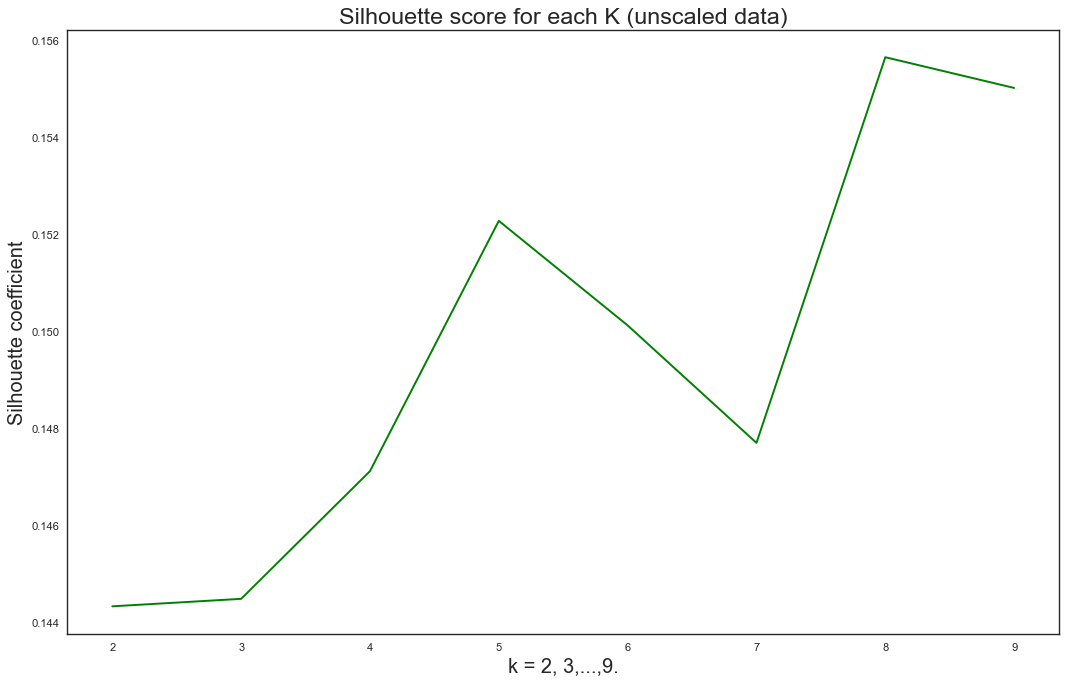

In [16]:
# The silhouette plot as a vaster method to find optimal k.

silhouette_unscaled = []
for k in range (2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(df_processed)
    silhouette_coefficient = silhouette_score(df_processed, kmeans.labels_,metric="euclidean")
    silhouette_unscaled.append(silhouette_coefficient)

plt.figure(figsize = (16, 10), dpi = 80)  
plt.plot(range(2,10), silhouette_unscaled, color="green")
plt.title("Silhouette score for each K (unscaled data)", fontsize = 21)
plt.xlabel("k = 2, 3,...,9.", fontsize = 18)
plt.ylabel("Silhouette coefficient", fontsize = 18)
#plt.savefig("Images/Silhouette score unscaled data", bbox_inches="tight")
#plt.savefig("Images/Silhouette score unscaled data.pdf")
plt.show()  

The Silhouette score already expresses noticeably more clarity. It seems to confirm k = 5. 

The distances between the coefficients for k=5 and k=7 are already pretty low, but the silhouette score is low anyhow. This is why scaling the data is important, so we'll proceed to do that.

In [17]:
# [2] Scaling the data properly.

# Here we had the choice between the various methods we have come into contact with.

# We would use the StandardScaler by rule of thumb.
scaler = StandardScaler()
df_standardscaled = scaler.fit_transform(df_processed)

# With the boxplot we have seen that the averages deviated substantially from the mean. According to
# https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02 #
# in the "Tips: " section at the bottom of the page, a normally distributed data can also be achieved
# by using Quantile Transformation as a robust method for numerical values. As a bonus, it should take
# care of the outliers pretty well. We'll include it as well.

# https://machinelearningmastery.com/quantile-transforms-for-machine-learning/
df_quantile = df_processed
for column in df_quantile.columns:
    qt = QuantileTransformer(n_quantiles=10, random_state=42)
    df_quantile[column] = qt.fit_transform(df_quantile[column].to_frame())


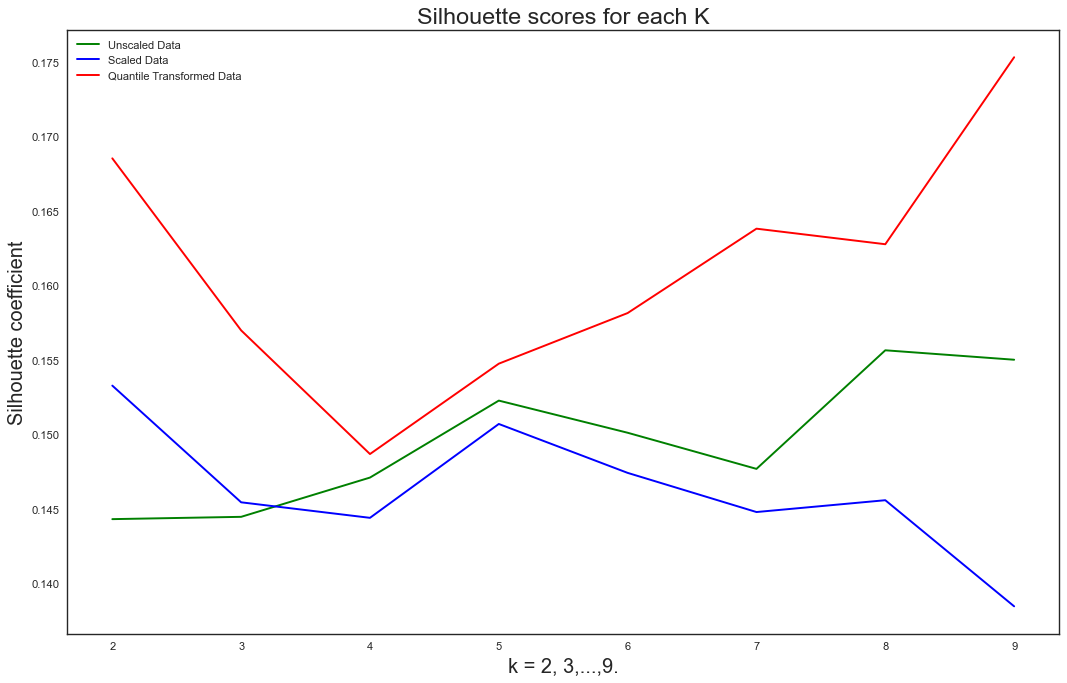

In [18]:
# [3] Preparing and plotting the Silhouette Score.

# Preparing the lists for the plots for the standard scaled and quantile transformed data.

# StandardScaler
silhouette_scaled = []
for k in range (2,10):
    kmeans_sc = KMeans(n_clusters=k, random_state=42)
    kmeans_sc.fit_predict(df_standardscaled)
    silhouette_coefficient_sc = silhouette_score(df_standardscaled, kmeans_sc.labels_,metric="euclidean")
    silhouette_scaled.append(silhouette_coefficient_sc)

# QuantileTransformer
silhouette_qt = []
for k in range (2,10):
    kmeans_qt = KMeans(n_clusters=k, random_state=42)
    kmeans_qt.fit_predict(df_quantile)
    silhouette_coefficient_qt = silhouette_score(df_quantile, kmeans_qt.labels_,metric="euclidean")
    silhouette_qt.append(silhouette_coefficient_qt)

plt.figure(figsize = (16, 10), dpi = 80)
plt.plot(range(2,10), silhouette_unscaled, color="green", label="Unscaled Data")
plt.plot(range(2,10), silhouette_scaled, color="blue", label="Scaled Data")
plt.plot(range(2,10), silhouette_qt, color="red", label="Quantile Transformed Data")
plt.title("Silhouette scores for each K", fontsize = 21)
plt.xlabel("k = 2, 3,...,9.", fontsize = 18)
plt.legend()
plt.ylabel("Silhouette coefficient", fontsize = 18)
#plt.savefig("Images/Silhouette score unscaled data", bbox_inches="tight")
#plt.savefig("Images/Silhouette score data.pdf")
plt.show()     

We can conclude the following:
- The optimum seems to converge towards k = 5.
- We see that the scaled data indicates that k = 8 is no recommendation anymore. 
- The transformed data indicates k = 9 to be an more precise alternative. However: As Data Scientists we also need to factor in that we want comprehensive results. The more clusters we take, the less expressive our results will be. We want to be crystal clear: To put all the users into 9 groups minimizes our features connecting and mitigates the potential strength of the clustering we are looking for. If we just chased the highest score, we would cluster into over fivethousand individuals. We are looking for comprehension about real life human individual preferences.


**This is important:**

We could continue with building the Silhouette plot based on k = 5 and k = 7, but first we have to note that the Silhouette coefficient is not as high as we expected, compared to our previous experiences. So how can that be? We used different preprocessing methods - in an informed way, avoiding just randomly processing the data. There are good reasons for this happening, and they are indeed good reasons to continue:

- The dataset is real life data, which is in another realm than prebuilt sets and can be difficult to cluster. 
- We are analysing *human behavior* here, which is incredibly diverse and has and will always be hard to differentiate.
- The human behavior we are analysing stems from a multitude of undisclosed factors, which are forming the individual preferences we seek.
- We keep the unscaled data within our choices, as preprocessing does not automatically mean we would get better results.
- We could go with k = 2, but we want to know where to place our flyers and advertising as well. We must keep our mission in mind.
- We do not pick our mission and data at its best, often it is not a choice. We must work with what we have got.

    -> Before this background, it is actually amazing that we are gaining silhouette scores which are **not** sharply converging to 0 - which would express full individuality of the individual behaviors we are about to map.

In [19]:
# [4] Looking at the optimal k for the now scaled or transformed data.

# We use the Silhouette Visualizer. We beautify our already existing function a bit.

def plot_silhouette(kmeans, data, title, filename):

    
    plt.figure(figsize=(8, 8))
    X_sub=data
    y_pred = kmeans.fit_predict(X_sub)
    
    visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick", is_fitted=True)
    visualizer.fit(X_sub)        # Fit the data to the visualizer
    visualizer.finalize()
    #plt.savefig(f"Images/Silhouette score-{filename}.pdf")
    print(f"Average silhoutte score: {visualizer.silhouette_score_}")
    visualizer.show()        # Finalize and render the figure
    

Average silhoutte score: 0.15476638934603174


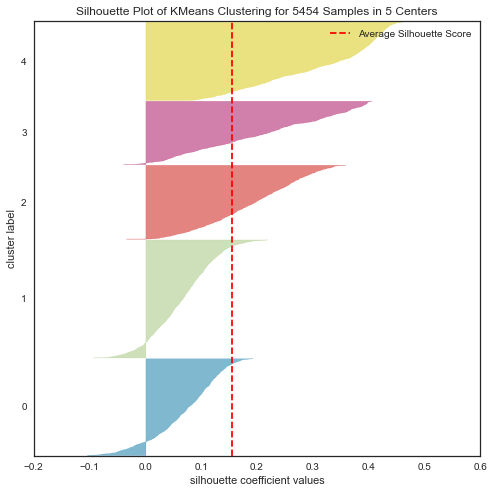

In [20]:
kmeans=KMeans(n_clusters=5, random_state=1)
plot_silhouette(kmeans, df_processed.values, "k=5", "Unscaled Dataset")

Average silhoutte score: 0.15066743583037262


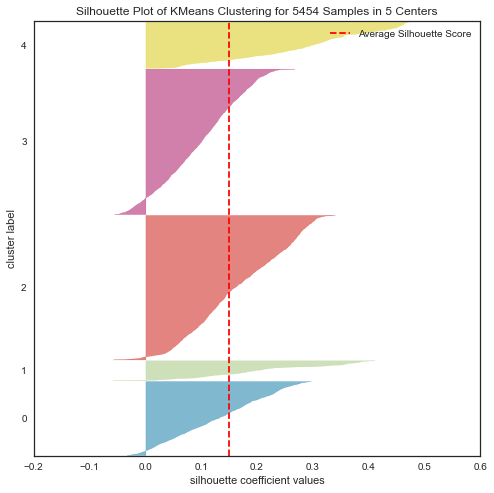

In [21]:
kmeans=KMeans(n_clusters=5, random_state=1)
plot_silhouette(kmeans, df_standardscaled, "k=5", "Scaled Dataset")


Average silhoutte score: 0.16405053854674295


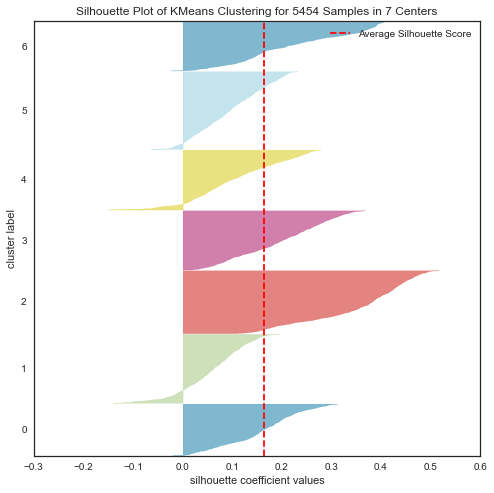

In [22]:
kmeans=KMeans(n_clusters=7, random_state=1)
plot_silhouette(kmeans, df_quantile.values, "k=7", "Quantile Transformed Dataset")

The highest score is seen with the quantile transformation and k = 7. We also see that all clusters pass the average silhouette score.

The unscaled data may have a higher score than the standard scaled data, but in the unscaled data the bottom two clusters have a quite a bad ratio regarding true to false association. That means these two clusters carry possibly more falsely associated values with them. Hence the second best choice would be the standard scaler. This is a demonstration of how it is important to understand plots and be able to read the graphical representations as well, to not just rely on simple numeric scores.

We continue with the dimensionality reduction.

In [23]:
df_quantile.head(5)

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs/Bars,...,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Beauty & Spas,Cafes,View Points,Monuments,Gardens
0,0.0,0.00000,0.816055,0.732861,1.0,0.581871,1.0,0.506944,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.220044,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.816055,0.732861,1.0,0.581871,1.0,0.559259,0.319865,0.481481,...,0.62963,0.123457,0.108932,0.0,0.220044,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.816055,0.731284,1.0,0.581871,1.0,0.559259,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.220044,0.0,0.0,0.0,0.0,0.0
3,0.0,0.06105,0.816055,0.731284,1.0,0.581871,1.0,0.506944,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.220044,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.816055,0.731284,1.0,0.581871,1.0,0.559259,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.220044,0.0,0.0,0.0,0.0,0.0


#### Dimensionality reduction and Clustering

Now we are prepared to get to the conclusions of our mission:

    - [1] We employ Principal component analysis as a linear dimensionality reduction (method of the realms of dimensionality reduction).
    - [2] We cluster the data using the KMeans algorithm in a scatterplot (method of the realms of clustering).
    - [3] We interprete the plot and pick out the features according to the clusters from the visualization.

Afterwards we jump to the sum of conclusions for our findings and recommendations for our customers.

In [24]:
###########################
### We work by our list ###
###########################

# [1] We employ Principal component analysis as a linear dimensionality reduction.

# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# This class allows us to project our data to a lower dimensional space.
# We need to have two components for our KMeans clustering scatterplot.

pca = PCA(n_components=2, svd_solver="full")
pca_array = pca.fit_transform(df_quantile)
print("The variance ratio for the two components are ", pca.explained_variance_ratio_)
print("This value is a reprentation of the percentage of information kept from the original dataset. Our set remains in the same domain, but the information loss there. However, PCA never tells if the information lost was relevant or irrelevant, and this was to be expected. Reduction is our goal, and we have a lot of redundancy in the dataset to begin with.\n")
pca.components_
# Picking out the two components
df_pca = pd.DataFrame({"PCA X" : pca_array[:,0], "PCA Y" : pca_array[:,1]})
df_pca.info()


The variance ratio for the two components are  [0.23573424 0.16201493]
This value is a reprentation of the percentage of information kept from the original dataset. Our set remains in the same domain, but the information loss there. However, PCA never tells if the information lost was relevant or irrelevant, and this was to be expected. Reduction is our goal, and we have a lot of redundancy in the dataset to begin with.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA X   5454 non-null   float64
 1   PCA Y   5454 non-null   float64
dtypes: float64(2)
memory usage: 85.3 KB


[On variance ratio](https://www.researchgate.net/post/Higher_variance_in_PCA_can_mean_that_data_structure_is_less_informative)

Here we have taken the components and set up a dataframe to use in our KMeans Clustering scatterplot. 

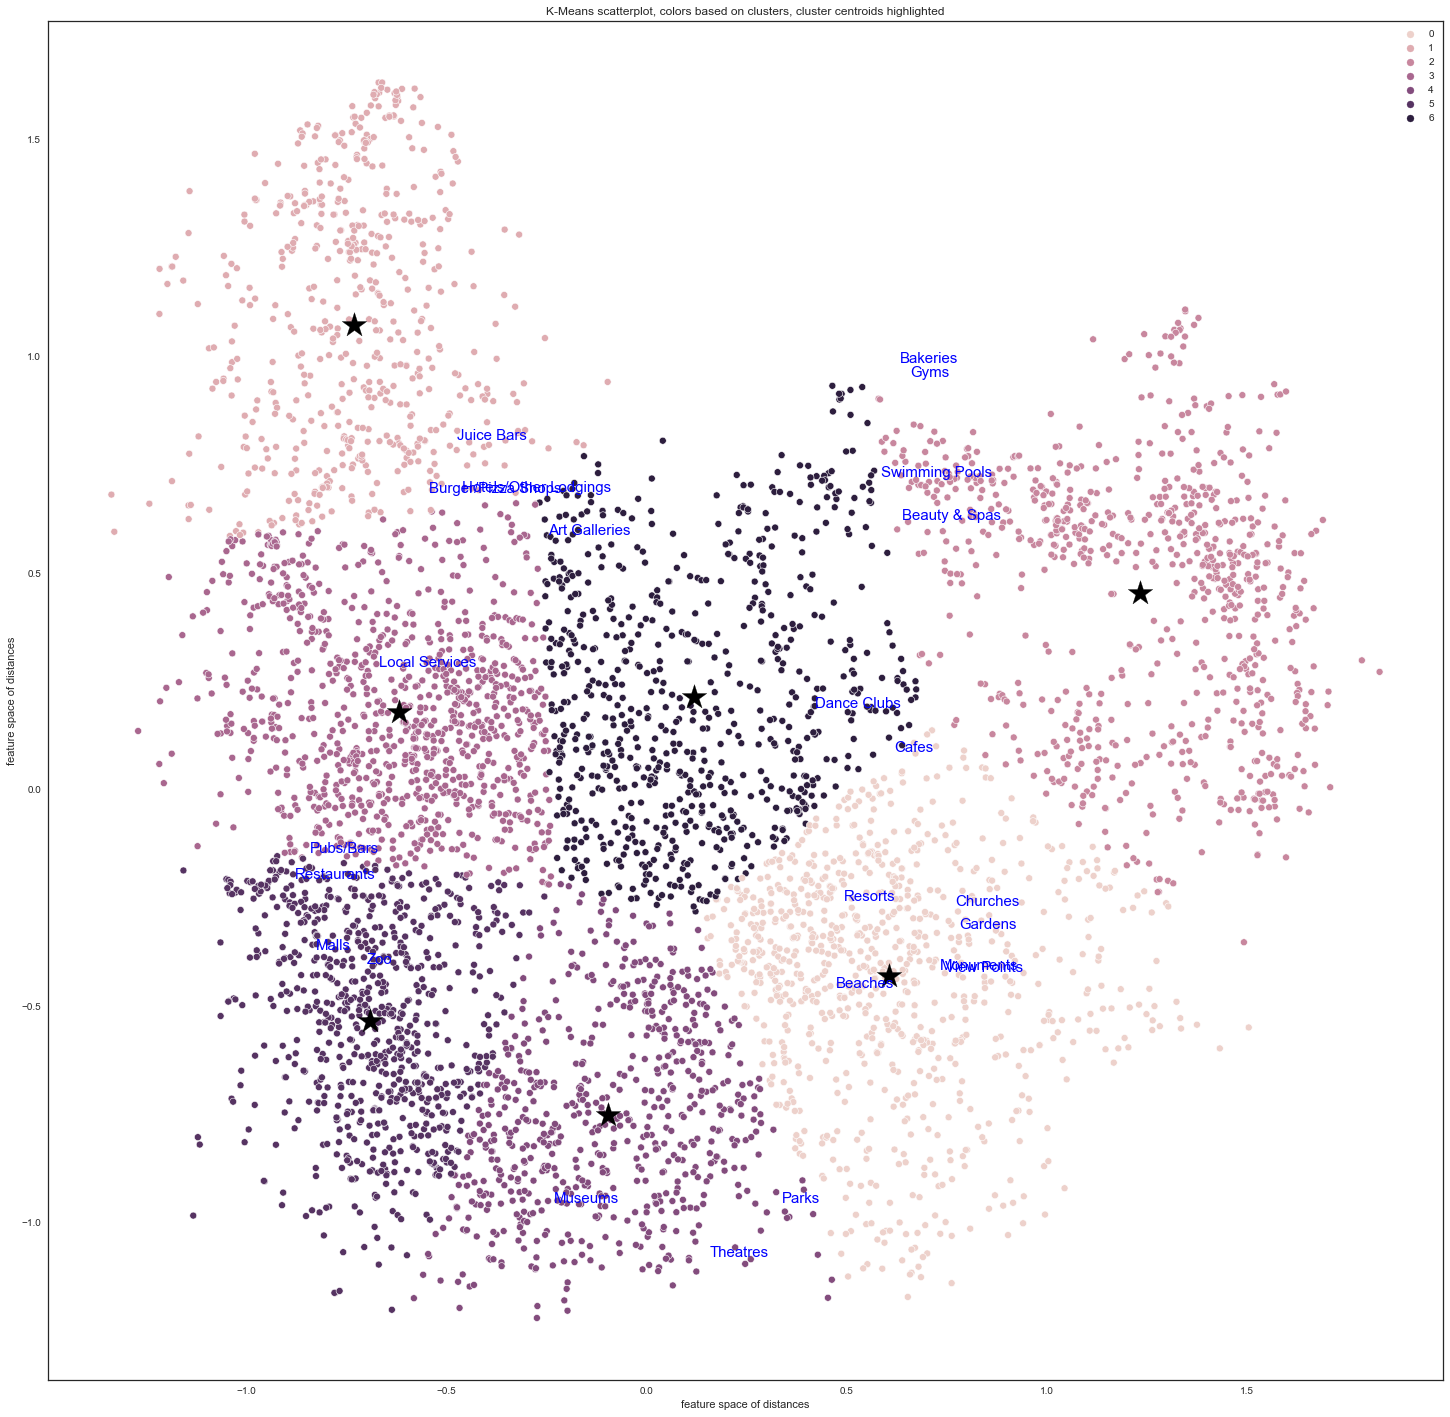

The points represent the individuals, and the distances of the visitors to the labels show how they prefer or disapprove of the mentioned sites. The 7 clusters contain various grouped preferences of visitors and what they enjoy, so we can build target groups:
1) Resorts, Churches, Gardens, Beaches, Monuments, View Points.
2) Museums, Theatres, and Parks.
3) Malls, Zoo, Restaurants.
4) Local Services, Pubs/Bars.
5) Juice Bars, Burger/Pizza Shops, Hotels/Other Lodgings.
6) Art Galleries, Cafes, Dance Clubs.
7) Bakeries, Gyms, Beauty & Spas, Swimming Pools.


In [25]:
# [2] We cluster the data using the KMeans method in a scatterplot.

# We are setting KMeans up as usual and use k = 7 and the dataset processed by the quantile transformation.
kmeans=KMeans(n_clusters=7, random_state=1)
kmeans.fit_transform(df_pca)

# We define the figure size of the subplots.
plot_clusters_with_centers = plt.subplots(figsize=(25, 25))

# We set up the method to plot (plt.scatter), set data, set x, set y, and we take hue (color encoding) from the labels in kmeans.
plot_clusters_with_centers = sns.scatterplot(data = df_pca, x = "PCA X", y = 'PCA Y', hue = kmeans.labels_)

# We call .scatter and take get the location using cluster_centers_ for x and y, set the marker to star, size to the devil, and paint it all black.
plot_clusters_with_centers.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = "*", s = 666, c = "black")

# Reverses the axis of the components in our pca array and fill into features.
features = np.transpose(pca.components_)

# Set tuple index to any, which is 0.
n = features.shape[0]

# Define plot labels
plt.title("K-Means scatterplot, colors based on clusters, cluster centroids highlighted")
plt.xlabel("feature space of distances")
plt.ylabel("feature space of distances")

# Fill in labels (of the features) with a list of the column names.
labels = list(df_quantile.columns)

# Set up the labels of the features in the space. The spread had to get dialed in to properly fit the model.
for i in range(n):
    plt.text(features[i,0]*3, features[i,1]*3, labels[i], size = 15, color = "blue")

# Cast the plot and let it work.
plt.show()   

# [3] We interprete the plot and pick out the features according to the clusters from the visualization.

print("The points represent the individuals, and the distances of the visitors to the labels show how they prefer or disapprove of the mentioned sites. The 7 clusters contain various grouped preferences of visitors and what they enjoy, so we can build target groups:")
print("1) Resorts, Churches, Gardens, Beaches, Monuments, View Points.\n2) Museums, Theatres, and Parks.\n3) Malls, Zoo, Restaurants.\n4) Local Services, Pubs/Bars.\n5) Juice Bars, Burger/Pizza Shops, Hotels/Other Lodgings.\n6) Art Galleries, Cafes, Dance Clubs.\n7) Bakeries, Gyms, Beauty & Spas, Swimming Pools.")

#### We conclude our findings and recommendations.:

A) During exploration of the distribution of the data we casted the boxplot and noted:

    We can already give our first recommendation to the customer, which is that it is very important to avoid any source of dissatisfaction with his visitors, as we see the threshold of rating dissatisfaction to be lower than anything else.

    Hence our customer should focus on avoiding mistakes and unpleasantries to his visitors first. Our customers may want to assemble his staff in each place and have them conduct supervised meetings for anonymous, targetted mind-mapping on the topic of what customers complained about or situations in which the customers seemed to have felt unwell or what could be improved. Hiring a consulting personell manager or one of our HR specialists to supervise and wrap the results of such meetings could be an viable option and by request we will be pleased to provide references.

B) During mapping of the clusters and their distributions we could differentiate between several groups of people:

    Here we can give the recommendation to the customer on where he should target his advertisement to in modern cross-channel advertisement. If one of his estates, sites or attractions belongs to a certain clustered group, he is best advised to target his advertisement at similar places of the same clustered target group. With our analysis, the customer is now able to focus his investments efficiently and achieve a higher ROI on placing advertisements.

    Hence our customer, aiming to increase the frequency of already well-intentioned visitors to one of his Museums, can place flyers in a Theatre. At the same time the Theatre can cross-place advertise with flyers at our customer's Museum. Another example would be online advertisement for his Pizza Shops whenever people search for Juice Bars, Burgers, Pizzas, or Places to stay. As is often the case, tourists looking for accommodations are also looking for quick places to eat upon the day of arrival, while checking out the good restaurants when they have the time and settled their arrival. If our customer requires consultation with a professional marketing specialist well-versed in local and modern online marketing solutions, it would be our pleasure to provide references.



